In [35]:
# Import packages
import pandas as pd

from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB

from numpy import concatenate
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
# Loading the data
lab = pd.read_csv(r"labelled.csv")
unlab = pd.read_csv(r"unlabelled.csv")
original_unlab = pd.read_csv(r"original_unlab.csv")

# PRE-PROCESSING DATA

# CLEANING LABELLED DATA (here we treat labelled data as TRAINING DATA)

# Remove hyperlinks, usernames

In [3]:
# remove URL links, Website addresses and Twitter usernames
lab['text'] = lab['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'@\w+', '', regex=True)
print(lab['text'])

0         is upset that he can't update his Facebook by ...
1          I dived many times for the ball. Managed to s...
2           my whole body feels itchy and like its on fire 
3          hey  long time no see! Yes.. Rains a bit ,onl...
4                                 nope they didn't have it 
                                ...                        
524698    Good morning people of twitter. TGIFriday! Tha...
524699                        in tampa... going to see him 
524700              GRINGO STAR tonight. Southern garage.  
524701    Mid-morning snack time... A bowl of cheese noo...
524702                 cant wait til her date this weekend 
Name: text, Length: 524703, dtype: object


# Remove all special characters and punctuation
# Tokenizer

In [4]:
# split sentences into token units
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
lab['text'] = lab['text'].apply(token.tokenize)
print(lab['text'])

0         [is, upset, that, he, can, t, update, his, Fac...
1         [I, dived, many, times, for, the, ball, Manage...
2         [my, whole, body, feels, itchy, and, like, its...
3         [hey, long, time, no, see, Yes, Rains, a, bit,...
4                           [nope, they, didn, t, have, it]
                                ...                        
524698    [Good, morning, people, of, twitter, TGIFriday...
524699                     [in, tampa, going, to, see, him]
524700            [GRINGO, STAR, tonight, Southern, garage]
524701    [Mid, morning, snack, time, A, bowl, of, chees...
524702          [cant, wait, til, her, date, this, weekend]
Name: text, Length: 524703, dtype: object


# Lemmatizer

In [5]:
# Find the standardised or base form of a word
lem = WordNetLemmatizer()
lab['text'] = lab['text'].apply(
                    lambda lst:[lem.lemmatize(word,'v') for word in lst])
lab['text'] = lab['text'].apply( lambda x: ' '.join(map(str,x)))
print(lab['text'])

0         be upset that he can t update his Facebook by ...
1         I dive many time for the ball Managed to save ...
2             my whole body feel itchy and like its on fire
3         hey long time no see Yes Rains a bite only a b...
4                                  nope they didn t have it
                                ...                        
524698    Good morning people of twitter TGIFriday Thats...
524699                               in tampa go to see him
524700                  GRINGO STAR tonight Southern garage
524701    Mid morning snack time A bowl of cheese noodle...
524702                  cant wait til her date this weekend
Name: text, Length: 524703, dtype: object


# Turn the text content into numerical feature vectors

In [6]:
# create a Vectorizer Object
cv = CountVectorizer(lowercase= True,
                     stop_words='english',
                     ngram_range = (1,1),                     
                     tokenizer = token.tokenize)

In [7]:
# encode the text of labelled data
X_train = cv.fit_transform(lab['text'])
#print("\nText counts for labelled data: \n", X_train)

In [8]:
# define y_train
y_train = lab.sentiment

# CLEANING UNLABELLED DATA (here we treat unlabelled data as TEST DATA)

# Remove hyperlinks, usernames

In [9]:
# remove URL links, Website addresses and Twitter usernames
unlab['text'] = unlab['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'@\w+', '', regex=True)
print(unlab['text'])

0           - A that's a bummer.  You shoulda got David ...
1          no, it's not behaving at all. i'm mad. why am...
2                                       not the whole crew 
3                                               Need a hug 
4               spring break in plain city... it's snowing 
                                ...                        
523868    today's message in the church service was deli...
523869    Back home, thought I'd done for the week, but ...
523870             My GrandMa is making Dinenr with my Mum 
523871     same here  say it like from the Terminiator m...
523872                              im great thaanks  wbuu?
Name: text, Length: 523873, dtype: object


# Remove all special characters and punctuation
# Tokenizer

In [10]:
# split sentences into token units
unlab['text'] = unlab['text'].apply(token.tokenize)
print(unlab['text'])

0         [A, that, s, a, bummer, You, shoulda, got, Dav...
1         [no, it, s, not, behaving, at, all, i, m, mad,...
2                                   [not, the, whole, crew]
3                                            [Need, a, hug]
4          [spring, break, in, plain, city, it, s, snowing]
                                ...                        
523868    [today, s, message, in, the, church, service, ...
523869    [Back, home, thought, I, d, done, for, the, we...
523870     [My, GrandMa, is, making, Dinenr, with, my, Mum]
523871    [same, here, say, it, like, from, the, Termini...
523872                           [im, great, thaanks, wbuu]
Name: text, Length: 523873, dtype: object


# Lemmatizer

In [11]:
# Find the standardised or base form of a word
unlab['text'] = unlab['text'].apply(
                    lambda lst:[lem.lemmatize(word,'v') for word in lst])
unlab['text'] = unlab['text'].apply( lambda x: ' '.join(map(str,x)))
print(unlab['text'])

0         A that s a bummer You shoulda get David Carr o...
1         no it s not behave at all i m mad why be i her...
2                                        not the whole crew
3                                                Need a hug
4                      spring break in plain city it s snow
                                ...                        
523868    today s message in the church service be deliv...
523869    Back home think I d do for the week but just h...
523870                My GrandMa be make Dinenr with my Mum
523871    same here say it like from the Terminiator mov...
523872                                im great thaanks wbuu
Name: text, Length: 523873, dtype: object


# Turn the text content into numerical feature vectors

In [12]:
# encode the text of unlabelled data
X_test = cv.transform(unlab.text)
#print("\nText counts: \n for unlabelled data", X_test)

In [13]:
# define y_test
y_test = unlab.sentiment

In [14]:
# define y true
# y true is  the real label of the unlabelled data before assigning sentiment values with -1
y_true = original_unlab.sentiment

# Data shape summary

In [15]:
print('Shape of endcoded labelled data: ', X_train.shape, y_train.shape)
print('Shape of endcoded unlabelled data: ', X_test.shape, y_test.shape)

Shape of endcoded labelled data:  (524703, 133053) (524703,)
Shape of endcoded unlabelled data:  (523873, 133053) (523873,)


# SUPERVISED MODEL USING MULTINOMIAL NAIVE BAYES

In [16]:
# fit model on the Labelled training dataset
model1 = MultinomialNB().fit(X_train, y_train)         

In [17]:
# make prediction on the Unlabelled Test dataset
y_pred1 = model1.predict(X_test)  

In [36]:
# Evaluating our model
print('Supervised model using Multinomial Naive Bayes: \n')
print('Accuracy score : ', format(accuracy_score(y_true, y_pred1 )))
print('Precision score : ', format(precision_score(y_true, y_pred1, pos_label=4)))
print('Recall score : ', format(recall_score(y_true, y_pred1, pos_label=4)))
print('F1 score : ', format(f1_score(y_true, y_pred1, pos_label=4)))

Supervised model using Multinomial Naive Bayes: 

Accuracy score :  0.8187003338595423
Precision score :  0.7013757643135075
Recall score :  0.40715553404323973
F1 score :  0.5152204981625153


# SEMI-SUPERVISED MODEL USING SELF TRAINING CLASSIFIER

In [19]:
# combine the labelled and unlabelled X 
from scipy.sparse import vstack
X_train_mixed = vstack([X_train, X_test])

In [20]:
X_train_mixed.shape

(1048576, 133053)

In [21]:
# recombine training dataset labels
y_train_mixed = concatenate((y_train, y_test))

In [22]:
y_train_mixed.shape

(1048576,)

In [23]:
# define Logistic Regression model
logistis_regression_model = LogisticRegression (max_iter = 800)

# Input this model into the self-training classifier
model2 = SelfTrainingClassifier(logistis_regression_model)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
model2.fit(X_train_mixed, y_train_mixed)

SelfTrainingClassifier(base_estimator=LogisticRegression(max_iter=800))

In [24]:
# make prediction on Unlabelled Test data
y_pred2= model2.predict(X_test)

In [37]:
# Evaluating our model
print('Semi-supervised model using Logistic Regression: \n')
print('Accuracy score : ', format(accuracy_score(y_true, y_pred2 )))
print('Precision score : ', format(precision_score(y_true, y_pred1, pos_label=4)))
print('Recall score : ', format(recall_score(y_true, y_pred2, pos_label=4)))
print('F1 score : ', format(f1_score(y_true, y_pred2, pos_label=4)))

Semi-supervised model using Logistic Regression: 

Accuracy score :  0.8224531518135121
Precision score :  0.7013757643135075
Recall score :  0.4298402710551791
F1 score :  0.533956648528395


# SEMI-SUPERVISED MODEL BASED ON MULTINOMIAL NAIVE BAYES

In [26]:
# define Multinomial Naive Bayes model
clf = MultinomialNB()

In [27]:
# define Self Training Classifier
model3 = SelfTrainingClassifier(clf)

In [28]:
# fit the model into the self-training classifier
model3.fit(X_train_mixed, y_train_mixed)

SelfTrainingClassifier(base_estimator=MultinomialNB())

In [29]:
# make prediction on Unlabelled Test data
y_pred3= model3.predict(X_test)

In [38]:
# Evaluating our model
print('Semi-supervised model using Multinomial Naive Bayes: \n')
print('Accuracy score : ', format(accuracy_score(y_true, y_pred3 )))
print('Precision score : ', format(precision_score(y_true, y_pred1, pos_label=4)))
print('Recall score : ', format(recall_score(y_true, y_pred3, pos_label=4)))
print('F1 score : ', format(f1_score(y_true, y_pred3, pos_label=4)))

Semi-supervised model using Multinomial Naive Bayes: 

Accuracy score :  0.8114256699619946
Precision score :  0.7013757643135075
Recall score :  0.36854630525976123
F1 score :  0.48049264036937517


# PLOT THE SCORES OF THREE MODELS

In [39]:
# create a dataframe of performance score
score_data = [["MulNB",0.8187003338595423,0.7013757643135075, 0.40715553404323973,0.5152204981625153],
      ["Sem-sup + LR",0.8224531518135121,0.7013757643135075, 0.4298402710551791,0.533956648528395],
      ["Sem-sup + MulNB",0.8114256699619946,0.7013757643135075, 0.36854630525976123,0.48049264036937517]]

score_data_df = pd.DataFrame(score_data,columns=["Model Name","Accuracy","Precision", "Recall","F1"])
score_data_df

,Model Name,Accuracy,Precision,Recall,F1
0,MulNB,0.818700,0.701376,0.407156,0.515220
1,Sem-sup + LR,0.822453,0.701376,0.429840,0.533957
2,Sem-sup + MulNB,0.811426,0.701376,0.368546,0.480493


In [40]:
score_data_melted = score_data_df.melt("Model Name",var_name="Performance",value_name="Score")
score_data_melted

,Model Name,Performance,Score
0,MulNB,Accuracy,0.818700
1,Sem-sup + LR,Accuracy,0.822453
2,Sem-sup + MulNB,Accuracy,0.811426
3,MulNB,Precision,0.701376
4,Sem-sup + LR,Precision,0.701376
5,Sem-sup + MulNB,Precision,0.701376
6,MulNB,Recall,0.407156
7,Sem-sup + LR,Recall,0.429840
8,Sem-sup + MulNB,Recall,0.368546
9,MulNB,F1,0.515220


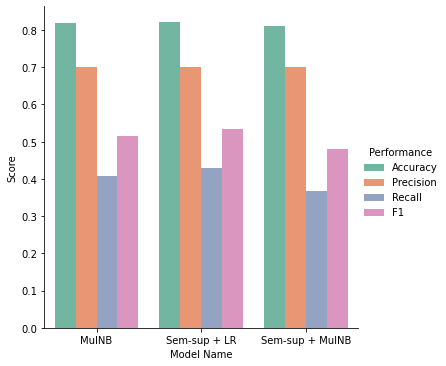

In [41]:
sns.catplot(x='Model Name', y='Score', hue='Performance', data=score_data_melted, kind='bar',palette="Set2")